# Monte Carlo Simulation for stochastich financial statements

In [11]:
#import packages
from math import log, sqrt, pi, exp
from scipy.stats import norm
from datetime import datetime, date
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [12]:
#import data
df = pd.read_excel("bd_coffee.xlsx")
df.head()

,date,close_date_6m,close_date_1y,time_6m,time_1y,coffee_cop,implied_vol_6m,implied_vol_1y,r,default_rate,buy_call_6m,buy_call_1y
0,2017-01-01,2017-07-18,2017-12-17,0.542466,0.958904,843952.256261,0.334027,0.285752,0.07204,0.16,NaN,NaN
1,2017-01-02,2017-07-18,2017-12-17,0.539726,0.956164,843952.256261,0.334027,0.285752,0.07204,0.16,NaN,NaN
2,2017-01-03,2017-07-18,2017-12-17,0.536986,0.953425,846107.552063,0.327560,0.279651,0.07204,0.16,NaN,NaN
3,2017-01-04,2017-07-18,2017-12-17,0.534247,0.950685,867484.574900,0.334248,0.285960,0.07129,0.16,NaN,NaN
4,2017-01-05,2017-07-18,2017-12-17,0.531507,0.947945,874782.510283,0.340986,0.292317,0.07124,0.16,NaN,NaN


## Series Fitting

In [13]:
coffee_hist = df["coffee_cop"].dropna()
coffee_hist

0       8.439523e+05
1       8.439523e+05
2       8.461076e+05
3       8.674846e+05
4       8.747825e+05
            ...     
1821    1.861471e+06
1822    1.847391e+06
1823    1.881263e+06
1824    1.889271e+06
1825    1.846430e+06
Name: coffee_cop, Length: 1826, dtype: float64

In [14]:
r = df["r"].dropna()
r

0       0.07204
1       0.07204
2       0.07204
3       0.07129
4       0.07124
         ...   
1821    0.03398
1822    0.03440
1823    0.03467
1824    0.03511
1825    0.03511
Name: r, Length: 1826, dtype: float64

In [15]:
vol_6m = df["implied_vol_6m"].dropna()
vol_6m

0       0.334027
1       0.334027
2       0.327560
3       0.334248
4       0.340986
          ...   
1821    0.412114
1822    0.402495
1823    0.409220
1824    0.414452
1825    0.413820
Name: implied_vol_6m, Length: 1826, dtype: float64

### Coffee

In [16]:
%%time
#from fitter import Fitter
#f1 = Fitter(coffee_hist)
#f1.fit()
# may take some time since by default, all distributions are tried
# but you call manually provide a smaller set of distributions
#f1.summary()

Wall time: 0 ns


### Interest rate

In [17]:
%%time
#from fitter import Fitter
#f2 = Fitter(r)
#f2.fit()
# may take some time since by default, all distributions are tried
# but you call manually provide a smaller set of distributions
#f2.summary()

Wall time: 0 ns


### Implied Volatility

In [18]:
%%time
#from fitter import Fitter
#f3 = Fitter(vol_6m)
#f3.fit()
# may take some time since by default, all distributions are tried
# but you call manually provide a smaller set of distributions
#f3.summary()

Wall time: 0 ns


In [19]:
%%time
#from fitter import Fitter
#f4 = Fitter(vol_1y)
#f4.fit()
# may take some time since by default, all distributions are tried
# but you call manually provide a smaller set of distributions
#f4.summary()

Wall time: 0 ns


## Series Simulation Sample

In [20]:
#calculate returns
df_hist = df.dropna().set_index("date")
df_hist["coffee_pct"] = df_hist["coffee_cop"].pct_change()

### Coffee

In [21]:
import math
# Parameter Definitions

# So    :   initial stock price
# dt    :   time increment -> a day in our case
# T     :   length of the prediction time horizon(how many time points to predict, same unit with dt(days))
# N     :   number of time points in the prediction time horizon -> T/dt
# t     :   array for time points in the prediction time horizon [1, 2, 3, .. , N]
# mu    :   mean of historical daily returns
# sigma :   standard deviation of historical daily returns
# b     :   array for brownian increments
# W     :   array for brownian path

s0 = df.at[0, "coffee_cop"]
sigma = df_hist["coffee_pct"].std() * sqrt(252)
mu = df_hist["coffee_pct"].mean()
dt = 1/365

def gbm(s0, sigma, mu, dt, n):
    time = 0
    gbmPrice = S0

    drift = mu
    price_sim = []
    for i in range(n):
        time = time + dt
        drift = mu * dt * gbmPrice
        uncertainity = np.random.normal(0) * math.sqrt(dt) * sigma *gbmPrice
        change = drift + uncertainity
        gbmPrice = gbmPrice + change
        price_sim.append(gbmPrice)
    return(price_sim)


In [22]:
price_simulation = gbm(s0, sigma, mu, dt, len(df))

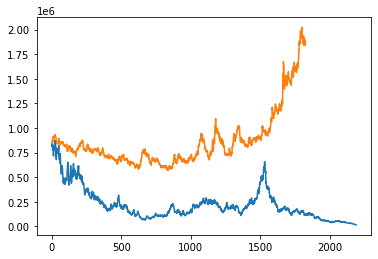

In [23]:
plt.plot(np.array(price_simulation))
plt.plot(df["coffee_cop"])

### Interest Rate

Interest Rate Simulation sample: https://sarit-maitra.medium.com/pca-monte-carlo-simulation-for-vasicek-interest-rate-model-9522858cc89d

### Implied Volatility

### Default Rate

# Monte Carlo Simulation

In [40]:
#define Black Model 76
def call_b76(S,K,T,r,sigma):
    lns0k = log(S/K)
    sig = ((sigma**2)/2.0)*T 
    srt = sigma*sqrt(T)
    d1 = (lns0k + sig) / srt
    d2 = d1 - srt
    Nd1 = norm.cdf(d1)
    Nd2 = norm.cdf(d2)
    ert = exp(-T*r)
    price = (S*Nd1) - (ert*(K*Nd2))
    return(price)

In [29]:
df.head()

,date,close_date_6m,close_date_1y,time_6m,time_1y,coffee_cop,implied_vol_6m,implied_vol_1y,r,default_rate,buy_call_6m,buy_call_1y
0,2017-01-01,2017-07-18,2017-12-17,0.542466,0.958904,843952.256261,0.334027,0.285752,0.07204,0.16,NaN,NaN
1,2017-01-02,2017-07-18,2017-12-17,0.539726,0.956164,843952.256261,0.334027,0.285752,0.07204,0.16,NaN,NaN
2,2017-01-03,2017-07-18,2017-12-17,0.536986,0.953425,846107.552063,0.327560,0.279651,0.07204,0.16,NaN,NaN
3,2017-01-04,2017-07-18,2017-12-17,0.534247,0.950685,867484.574900,0.334248,0.285960,0.07129,0.16,NaN,NaN
4,2017-01-05,2017-07-18,2017-12-17,0.531507,0.947945,874782.510283,0.340986,0.292317,0.07124,0.16,NaN,NaN


In [46]:
r_array = df["r"].fillna(method = "ffill")
sigma6_array = df["implied_vol_6m"].fillna(method = "ffill")
default_rate_array = df["default_rate"].fillna(method = "ffill")

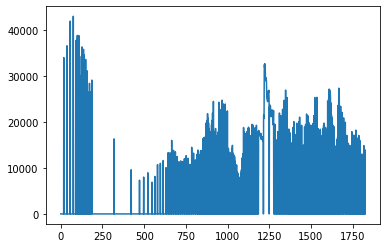

In [55]:
premium_factor = 0.39
vol_factor = 1/0.45 * 93.03 #AJUSTAR ESTO

T_6 = df["time_6m"]
T_1 = df["time_1y"]
buys_6m_call = df["buy_call_6m"].fillna(0)
buys_1y_call = df["buy_call_1y"].fillna(0)




coffee_price_sim = gbm(s0, sigma, mu, dt, len(df))
#simulate interest rate
r_sim = r_array
#simulate  implied volatility via gbm
sigma6_sim = sigma6_array
#simulate default rate with random number 
default_rate_sim = default_rate_array
#calculate black scholes for every day
option_prices = []
premia_prices = []

for j in range(len(coffee_price_sim)):
        S = coffee_price_sim[j]
        K = S
        T = T_6[j]
        r = r_sim[j]
        sigma = sigma6_sim[j]
        option_price = call_b76(S, K, T, r, sigma)
        option_prices.append(option_price)
        premium_price = option_price * premium_factor
        premia_prices.append(premium_price)

premia = np.array(premia_prices) * np.array(buys_6m_call)


In [54]:
df["buy_call_6m"].fillna(0)

,date,close_date_6m,close_date_1y,time_6m,time_1y,coffee_cop,implied_vol_6m,implied_vol_1y,r,default_rate,buy_call_6m,buy_call_1y
0,2017-01-01,2017-07-18,2017-12-17,0.542466,0.958904,843952.256261,0.334027,0.285752,0.07204,0.16,NaN,NaN
1,2017-01-02,2017-07-18,2017-12-17,0.539726,0.956164,843952.256261,0.334027,0.285752,0.07204,0.16,NaN,NaN
2,2017-01-03,2017-07-18,2017-12-17,0.536986,0.953425,846107.552063,0.327560,0.279651,0.07204,0.16,NaN,NaN
3,2017-01-04,2017-07-18,2017-12-17,0.534247,0.950685,867484.574900,0.334248,0.285960,0.07129,0.16,NaN,NaN
4,2017-01-05,2017-07-18,2017-12-17,0.531507,0.947945,874782.510283,0.340986,0.292317,0.07124,0.16,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2186,2022-12-27,NaT,NaT,NaN,NaN,NaN,NaN,NaN,0.03511,NaN,NaN,NaN
2187,2022-12-28,NaT,NaT,NaN,NaN,NaN,NaN,NaN,0.03511,NaN,NaN,NaN
2188,2022-12-29,NaT,NaT,NaN,NaN,NaN,NaN,NaN,0.03511,NaN,NaN,NaN
2189,2022-12-30,NaT,NaT,NaN,NaN,NaN,NaN,NaN,0.03511,NaN,NaN,NaN


In [ ]:
n = 1000
df_stoch_fs = pd.DataFrame()

T_6 = df["time_6m"]
T_1 = df["time_1y"]
buys_6m_call = df["buy_call_6m"].fillna(0)
buys_1y_call = df["buy_call_1y"].fillna(0)

for i in range(n):
    #Simulate price via gbm
    coffee_price_sim = gbm(s0, sigma, mu, dt, len(df))
    #simulate interest rate
    r_sim = r
    #simulate  implied volatility via gbm
    sigma6_sim = sigma6
    #simulate default rate with random number 
    default_rate_sim = np.random.normal()
    #calculate black scholes for every day
    for j in range(len_coffee_price_sim):
        S = coffee_price_sim[j]
        K = S
        T = T_6[j]
        r = r_sim[j]
        sigma = sigma6_sim[j]
        option_price = call_b76(S, K, T, r)
    #calculate premium for every day
    
    #calculate defalut for day (look for price at expiry)
    
    #sum financial statement lines by year
    #append results of financial statement lines to df_stoch_fs
